In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#Task 1 : DATA EXPLORATION AND PREPROCESSING

In [3]:
#Reading the file and printing first five rows of dataset
df = pd.read_csv("Dataset.csv")
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df.shape

(9551, 21)

In [7]:
#Checking the total no. of rows and columns
rows = df.shape[0]
cols = df.shape[1]

print(f"Number of rows : {rows}")
print(f"Number of columns : {cols}")

Number of rows : 9551
Number of columns : 21


In [8]:
#Getting the information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant ID         9551 non-null   int64   
 1   Restaurant Name       9551 non-null   object  
 2   Country Code          9551 non-null   category
 3   City                  9551 non-null   category
 4   Address               9551 non-null   object  
 5   Locality              9551 non-null   object  
 6   Locality Verbose      9551 non-null   object  
 7   Longitude             9551 non-null   float64 
 8   Latitude              9551 non-null   float64 
 9   Cuisines              9542 non-null   category
 10  Average Cost for two  9551 non-null   int64   
 11  Currency              9551 non-null   object  
 12  Has Table booking     9551 non-null   object  
 13  Has Online delivery   9551 non-null   object  
 14  Is delivering now     9551 non-null   object  
 15  Swit

In [9]:
#Checking missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#Dropping the null values as it less in numbers (i.e 9)
df.dropna(axis = 0,inplace = True)
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
#Changing the Column type into a category as per understanding
df['Country Code']=df['Country Code'].astype('category')
df['City']=df['City'].astype('category')
df['Cuisines']=df['Cuisines'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Restaurant ID         9542 non-null   int64   
 1   Restaurant Name       9542 non-null   object  
 2   Country Code          9542 non-null   category
 3   City                  9542 non-null   category
 4   Address               9542 non-null   object  
 5   Locality              9542 non-null   object  
 6   Locality Verbose      9542 non-null   object  
 7   Longitude             9542 non-null   float64 
 8   Latitude              9542 non-null   float64 
 9   Cuisines              9542 non-null   category
 10  Average Cost for two  9542 non-null   int64   
 11  Currency              9542 non-null   object  
 12  Has Table booking     9542 non-null   object  
 13  Has Online delivery   9542 non-null   object  
 14  Is delivering now     9542 non-null   object  
 15  Switch to

In [13]:
#Analyzing the target variable "Aggregate Rating"
target_var = 'Aggregate rating'
print(df['Aggregate rating'].describe())

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


C:\Users\gaura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


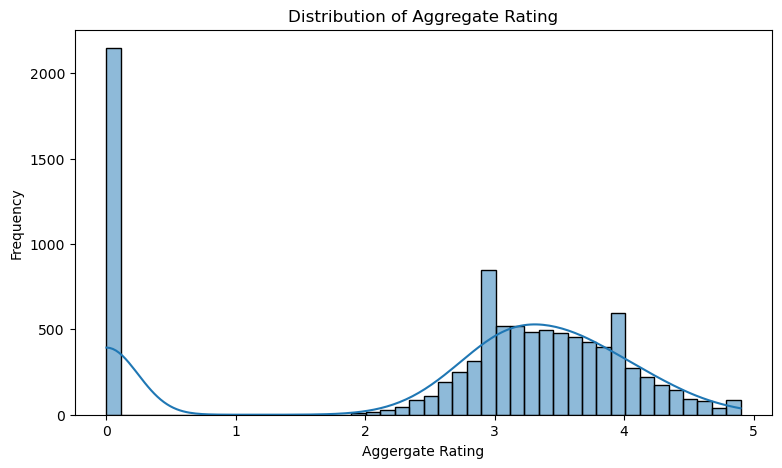

In [14]:
# Creating Histogram 
plt.figure(figsize=(9,5))
sns.histplot(df[target_var], kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggergate Rating')
plt.ylabel('Frequency')
plt.show()

"
This shows the histogram of "Aggregate Rating" and tells us most ratings are at 0, with the rest being more evenly distributed 
between 2 and 5, peaking around 3 and 4. This distribution highlights a significant number of zero ratings, 
suggesting many items or services received no or very low ratings.
"



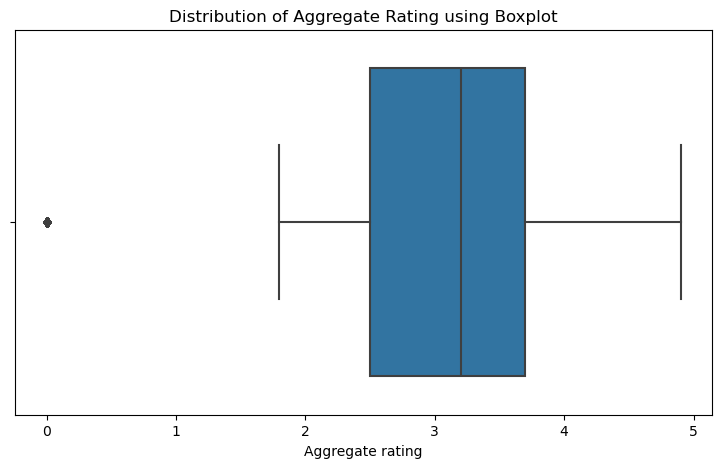

In [15]:
# Creating Boxplot
plt.figure(figsize=(9,5))
sns.boxplot(x=df[target_var])
plt.title('Distribution of Aggregate Rating using Boxplot')
plt.xlabel(target_var)
plt.show()

"This boxplot of "Aggregate rating" shows the interquartile range (IQR) spans from approximately 2 to 4, with the median around 3. The whiskers indicate the minimum and maximum values within 1.5 times the IQR, while an outlier is at a rating of 0, emphasizing the spread and central tendency of the ratings."

#Task 2 : DESCRIPTIVE ANALYSIS

In [16]:
#Selecting the numerical columns and calculating basis statiscal measures for them
numerical_values = df.select_dtypes(include = ['int64','float64'])
numerical_values.describe()

Restaurant ID    Longitude     Latitude  Average Cost for two  \
count   9.542000e+03  9542.000000  9542.000000           9542.000000   
mean    9.043301e+06    64.274997    25.848532           1200.326137   
std     8.791967e+06    41.197602    11.010094          16128.743876   
min     5.300000e+01  -157.948486   -41.330428              0.000000   
25%     3.019312e+05    77.081565    28.478658            250.000000   
50%     6.002726e+06    77.192031    28.570444            400.000000   
75%     1.835260e+07    77.282043    28.642711            700.000000   
max     1.850065e+07   174.832089    55.976980         800000.000000   

       Price range  Aggregate rating         Votes  
count  9542.000000       9542.000000   9542.000000  
mean      1.804968          2.665238    156.772060  
std       0.905563          1.516588    430.203324  
min       1.000000          0.000000      0.000000  
25%       1.000000          2.500000      5.000000  
50%       2.000000          3.200000     31.000000  
75%       2.000000          3.700000    130.000000  
max       4.000000          4.900000  10934.000000

In [17]:
#Exploring Distribution on different Categorical Values
country_counts = df['Country Code'].value_counts()
city_counts = df['City'].value_counts()
cuisine_counts = df['Cuisines'].value_counts()
print(f'\nDistribution of Country Code :\n{country_counts}\n')
print(f'\nDistribution of Country Code :\n{city_counts}\n')
print(f'\nDistribution of Country Code :\n{cuisine_counts}')


Distribution of Country Code :
Country Code
1      8652
216     425
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64


Distribution of Country Code :
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Penola               1
Phillip Island       1
Potrero              1
Panchkula            1
Miller               0
Name: count, Length: 141, dtype: int64


Distribution of Country Code :
Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Continental

In [18]:
#Identifying the Top Cuisines Overall
top_cuisines = df['Cuisines'].value_counts().head(10)
print(f"The Top 10 Cuisines are as follows : \n{top_cuisines}")

The Top 10 Cuisines are as follows : 
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [19]:
#Cities with the highest number of restaurants
top_restaurants = df['City'].value_counts().head(10)
print(f"The Cities with highest number of restaurants : \n{top_restaurants}")

The Cities with highest number of restaurants : 
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Amritsar          21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Name: count, dtype: int64


#Task 3 : GEOSPATIAL ANALYSIS

In [20]:
# Create a map centered around the first point
map = folium.Map(location=[df['Latitude'][0], df['Longitude'][0]], zoom_start=2)

In [21]:
#Using loop statement to get eveyr location marked by 'circle' in the world map
for i in range(len(df)):    
     folium.Circle(        
          location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
          radius=10,    
     ).add_to(map)

In [22]:
#Showing the map
map

In [23]:
#Plotting the distribution of restaurants across different cities
plt.figure(figsize=(10, 6))
sns.countplot(y='City', data=data, order=data['City'].value_counts().head(20).index)
plt.title('Distribution of Restaurants Across Different Cities')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
#Plotting the distribution of restaurants across different cities
plt.figure(figsize=(10, 6))
sns.countplot(y='Country Code', data=data, order=data['Country Code'].value_counts().head(20).index)
plt.title('Distribution of Restaurants Across Different Countries Codes')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

In [ ]:
#Finding the Correlation between locations and Aggregate Rating
relation = data[['Longitude','Latitude', 'Aggregate rating']]
relation_corr = relation.corr()
relation_corr

<Axes: >

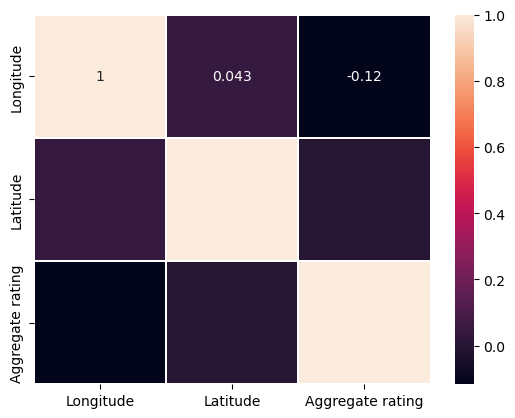

In [77]:
#Plotting a headtmapf for the defined correlation
sns.heatmap(relation_corr,annot=True,linewidth='0.1')